# Speed Dating

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment. 

Over the next few days, you'll learn how to use python libraries like seaborn, plotly and bokeh to produce data visualizations that highlight relevant facts about the dataset.

For today, you can start exploring the dataset with pandas to extract some statistics.

# Quelles sont les caractéristiques importantes pour obtenir l'amour ? 

## Importer de données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#!pip install plotly -q
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [2]:
#pio.renderers.default = "iframe" # using "iframe" if working on JULIE

In [3]:
pd.set_option("display.max_columns", None)
url = "https://raw.githubusercontent.com/huynam1012/Data-miniprojets/main/Speed%20Dating%20Data.csv"
df0 = pd.read_csv(url, encoding='ISO-8859-1', delimiter=',')
df0.head(3)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df0.shape)
print(set(df0["round"]))
print(df0["iid"].nunique())

(8378, 195)
{5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 18, 19, 20, 21, 22}
551


Each participants in the DataFrame meet serveral opposite gender for each of wave. Therefore, in order to count the real number of participants, we should apply "drop_duplicates" on the column "iid" which presents the unique subject number, group(wave id gender).

In [5]:
df1 = df0.drop_duplicates(subset='iid', keep="first")
df1.head(3)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
10,2,2.0,0,3,1,1,10,3,NaN,10,1,11.0,0,0.29,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,8.0,7.0,6.0,9.0,7.0,4.0,7.0,2.0,2.0,24.0,law,1.0,NaN,NaN,NaN,2.0,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,0,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.92,18.92,21.62,27.03,5.41,8.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,8.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
20,3,3.0,0,5,1,1,10,9,NaN,6,1,11.0,0,-0.24,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,7.0,8.0,6.0,5.0,8.0,4.0,5.0,2.0,1.0,25.0,Economics,2.0,NaN,NaN,NaN,2.0,8.0,4.0,Connecticut,"6,268",NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,0,7.0,9.0,10.0,7.0,8.0,9.0,8.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Description des variables


* gender: Gender of self, female = 0 and male = 1
* age: Age of self  
* age_o: Age of partner
* d_age: Difference in age  
* race: Race of self  
* race_o: Race of partner  
* samerace: Whether the two persons have the same race or not.  
* imprace = importance_same_race: How important is it that partner is of same race?  
* imprelig = importance_same_religion: How important is it that partner has same religion?  
* field: Field of study  
* pf_o_att = pref_o_attractive: How important does partner rate attractiveness  
* pf_o_sinc = pref_o_sinsere: How important does partner rate sincerity  
* pf_o_int = pref_o_intelligence: How important does partner rate intelligence  
* pf_o_fun = pref_o_funny: How important does partner rate being funny  
* pf_o_amb = pref_o_ambitious: How important does partner rate ambition  
* pf_o_sha = pref_o_shared_interests: How important does partner rate having shared interests  
* attr_o = attractive_o: Rating by partner (about me) at night of event on attractiveness  
* sinc_o = sincere_o: Rating by partner (about me) at night of event on sincerity  
* intel_o = intelligence_o: Rating by partner (about me) at night of event on intelligence  
* fun_o = funny_o: Rating by partner (about me) at night of event on being funny  
* amb_o = ambitous_o: Rating by partner (about me) at night of event on being ambitious  
* shar_o = shared_interests_o: Rating by partner (about me) at night of event on shared interest  
* attractive_important: What do you look for in a partner - attractiveness  
* sincere_important: What do you look for in a partner - sincerity  
* intellicence_important: What do you look for in a partner - intelligence  
* funny_important: What do you look for in a partner - being funny  
* ambtition_important: What do you look for in a partner - ambition  
* shared_interests_important: What do you look for in a partner - shared interests  
* attr = attractive: Rate yourself - attractiveness  
* sinc = sincere: Rate yourself - sincerity   
* intel = intelligence: Rate yourself - intelligence   
* fun = funny: Rate yourself - being funny   
* amb = ambition: Rate yourself - ambition  
* attractive_partner: Rate your partner - attractiveness  
* sincere_partner: Rate your partner - sincerity   
* intelligence_partner: Rate your partner - intelligence   
* funny_partner: Rate your partner - being funny   
* ambition_partner: Rate your partner - ambition   
* shared_interests_partner: Rate your partner - shared interests  
* sports: Your own interests [1-10]  
* tvsports  
* exercise  
* dining  
* museums  
* art  
* hiking  
* gaming  
* clubbing  
* reading  
* tv  
* theater  
* movies  
* concerts  
* music  
* shopping  
* yoga  
* int_corr = interests_correlate: Correlation between participant's and partner's ratings of interests.  
* expected_happy_with_sd_people: How happy do you expect to be with the people you meet during the speed-dating event?  
* expected_num_interested_in_me: Out of the 20 people you will meet, how many do you expect will be interested in dating you?  
* expected_num_matches: How many matches do you expect to get?  
* like: Did you like your partner?  
* guess_prob_liked: How likely do you think it is that your partner likes you?   
* met: Have you met your partner before?  
* dec= decision: Decision at night of event.
* dec_o: Decision of partner at night of event.  
* match: Match (yes/no)

In [6]:
df1["gender"] = df0.gender.map({1 : "Homme", 0 : "Femmes"})
# race
cols = ["race", "race_o"]
df1[cols] = df0[cols].replace({1 : "Africaine",
                            2 : "Caucasienne",
                            3 : "Latino",
                            4 : "Asiatique",
                            5 : "Indien d'Amérique",
                            6 : "Autre"})
# field code
col = ["field_cd"]
df1[col] = df0[col].replace({1 : "Avocat",
                            2 : "Math",
                            3 : "Sciences sociales, Psychologue",
                            4 : "Sciences médicales, pharmaceutiques et biotech",
                            5 : "Ingénierie",
                            6 : "Anglais/Écriture Créative/Journalisme",
                            7 : "Histoire/Religion/Philosophie",
                            8 : "Entreprise/Finance",
                            9 : "Éducation, Académie",
                            10 : "Sciences Biologiques/Chimie/Physique",
                            11 : "Travail Social",
                            12 : "Undergrad/indécis",
                            13 : "Science politique/Affaires internationales",
                            14 : "Cinéma",
                            15 : "Administration des Arts",
                            16 : "Langues",
                            17 : "Architecture",
                            18 : "Autre"})
df1.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Femmes,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,Caucasienne,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,Avocat,NaN,NaN,NaN,Asiatique,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
10,2,2.0,Femmes,3,1,1,10,3,NaN,10,1,11.0,0,0.29,1,27.0,Caucasienne,35.0,20.0,20.0,20.0,0.0,5.0,0,8.0,7.0,6.0,9.0,7.0,4.0,7.0,2.0,2.0,24.0,law,Avocat,NaN,NaN,NaN,Caucasienne,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,0,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.92,18.92,21.62,27.03,5.41,8.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,8.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
20,3,3.0,Femmes,5,1,1,10,9,NaN,6,1,11.0,0,-0.24,1,27.0,Caucasienne,35.0,20.0,20.0,20.0,0.0,5.0,0,7.0,8.0,6.0,5.0,8.0,4.0,5.0,2.0,1.0,25.0,Economics,Math,NaN,NaN,NaN,Caucasienne,8.0,4.0,Connecticut,"6,268",NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,0,7.0,9.0,10.0,7.0,8.0,9.0,8.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,4.0,Femmes,7,1,1,10,6,NaN,3,1,11.0,0,-0.18,1,27.0,Caucasie

In [7]:
print("Noms de colonnes")
print(sorted(df1))

Noms de colonnes
['age', 'age_o', 'amb', 'amb1_1', 'amb1_2', 'amb1_3', 'amb1_s', 'amb2_1', 'amb2_2', 'amb2_3', 'amb3_1', 'amb3_2', 'amb3_3', 'amb3_s', 'amb4_1', 'amb4_2', 'amb4_3', 'amb5_1', 'amb5_2', 'amb5_3', 'amb7_2', 'amb7_3', 'amb_o', 'art', 'attr', 'attr1_1', 'attr1_2', 'attr1_3', 'attr1_s', 'attr2_1', 'attr2_2', 'attr2_3', 'attr3_1', 'attr3_2', 'attr3_3', 'attr3_s', 'attr4_1', 'attr4_2', 'attr4_3', 'attr5_1', 'attr5_2', 'attr5_3', 'attr7_2', 'attr7_3', 'attr_o', 'career', 'career_c', 'clubbing', 'concerts', 'condtn', 'date', 'date_3', 'dec', 'dec_o', 'dining', 'exercise', 'exphappy', 'expnum', 'field', 'field_cd', 'from', 'fun', 'fun1_1', 'fun1_2', 'fun1_3', 'fun1_s', 'fun2_1', 'fun2_2', 'fun2_3', 'fun3_1', 'fun3_2', 'fun3_3', 'fun3_s', 'fun4_1', 'fun4_2', 'fun4_3', 'fun5_1', 'fun5_2', 'fun5_3', 'fun7_2', 'fun7_3', 'fun_o', 'gaming', 'gender', 'go_out', 'goal', 'hiking', 'id', 'idg', 'iid', 'imprace', 'imprelig', 'income', 'int_corr', 'intel', 'intel1_1', 'intel1_2', 'intel1_3',

## L'analyse exploratoire de données

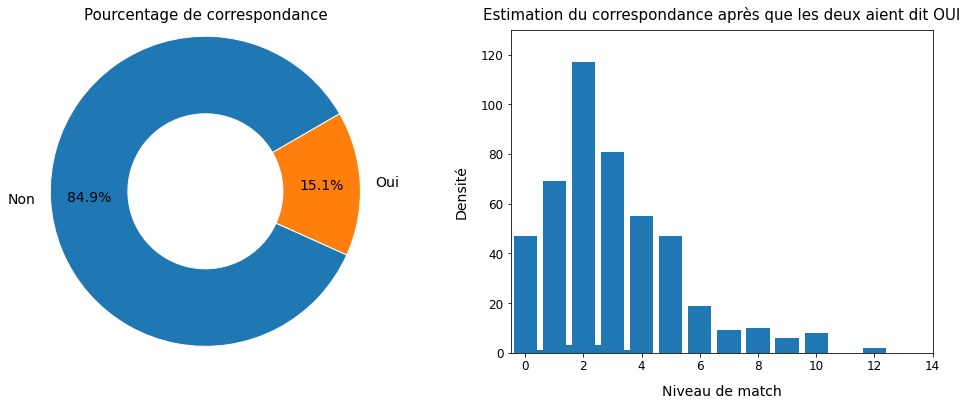

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
explode = (0.05,0.05,0.05,0.05,0.05)
axes[0].pie(df1["match"].value_counts().values, radius = 1.2, autopct='%1.1f%%', wedgeprops=dict(width=0.6, edgecolor='w'), 
        startangle=30, pctdistance=0.75,  textprops={'fontsize': 14}, labels = ["Non", "Oui"])
axes[0].set_title('Pourcentage de correspondance',pad=10, fontsize = 15)
axes[0].tick_params(colors='black', labelsize=12)



axes[1].bar(df1["match_es"].value_counts().index, df1["match_es"].value_counts().values)
axes[1].set_title("Estimation du correspondance après que les deux aient dit OUI", pad=10, fontsize = 15)
axes[1].set_xlabel("Niveau de match",labelpad = 12, fontsize = 14)
axes[1].set_ylabel("Densité",labelpad = 12, fontsize = 14)
axes[1].tick_params(colors='black', labelsize=12)
axes[1].set_xlim(-0.5, 14)
axes[1].set_ylim(0, 130)

#fig.suptitle('how many speed daters found a match', fontsize=16)

plt.tight_layout(pad=2.0)
plt.show()

**--> Il semble que seulement environ 15 % des personnes ont trouvé un bon partenaire pour un deuxième rendez-vous !**
**--> POURQUOI ?** 

In [9]:
df_out = df1.groupby(["go_out", "match"])["iid"].count()
df_out = df_out.reset_index()
df_out = df_out.rename(columns = {'iid':'count'})
density = df_out.pivot("go_out", "match", "count")

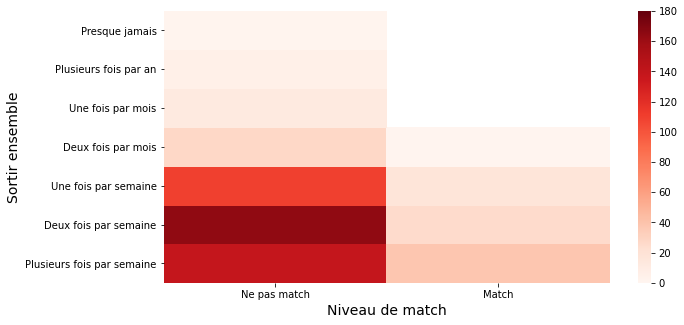

In [10]:
plt.figure(figsize=(10,5))
x_axis_labels = ["Ne pas match", "Match"] # labels for x-axis
y_axis_labels = ["Plusieurs fois par semaine", "Deux fois par semaine", "Une fois par semaine", "Deux fois par mois",
                    "Une fois par mois", "Plusieurs fois par an", "Presque jamais" ] # labels for y-axis
sns.heatmap(density, annot=False, cmap = "Reds", vmin=0, vmax=180, xticklabels=x_axis_labels, yticklabels=y_axis_labels).invert_yaxis()
plt.xlabel("Niveau de match", fontsize = 14)
plt.ylabel("Sortir ensemble",  fontsize = 14)
plt.show()

* Pour obtenir le match, le couple doit sortir emsemble au moins deux fois par mois.

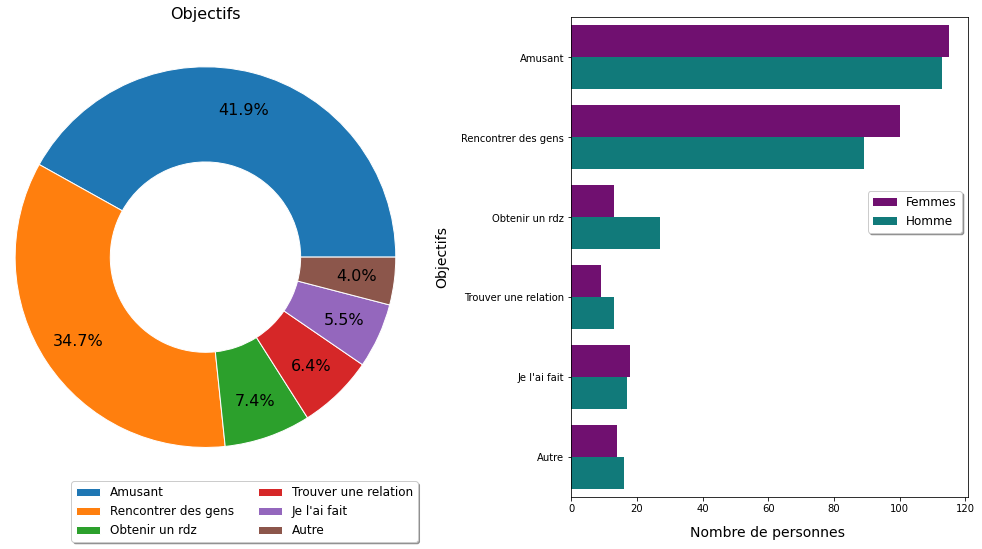

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14,8))
goals = ("Amusant","Rencontrer des gens", "Obtenir un rdz","Trouver une relation","Je l'ai fait" ,"Autre")
        
explode = (0.05,0.05,0.05,0.05,0.05)
axes[0].pie(df1["goal"].value_counts().values, radius = 1.2, autopct='%1.1f%%',
            wedgeprops=dict(width=0.6, edgecolor='w'), startangle=0, pctdistance=0.8,  textprops={'fontsize': 16})
axes[0].set_title("Objectifs",pad=40, fontsize = 16)
axes[0].legend(goals, bbox_to_anchor=(1.05, -0.05), fontsize= 12, ncol=2, shadow=True)

sns.countplot(y='goal',data=df1, hue='gender', palette=['purple','darkcyan'])
axes[1].set(yticklabels=goals)
axes[1].set_xlabel("Nombre de personnes ",labelpad = 12, fontsize = 14)
axes[1].set_ylabel("Objectifs",labelpad = 12, fontsize = 14)
axes[1].legend(bbox_to_anchor=(1, 0.65), fontsize= 12, ncol=1, shadow=True)

plt.tight_layout(pad=2.0)
plt.show()



* Seulement 13,8% de personnes viennent au rendez-vous pour chercher un partenaire !

In [12]:
df2 = df1.groupby(["age", "age_o"])["iid"].count()
df2 = df2.reset_index()
df2 = df2.rename(columns = {'iid':'count'})
df2.head(2)

,age,age_o,count
0,18.0,20.0,1
1,19.0,20.0,1


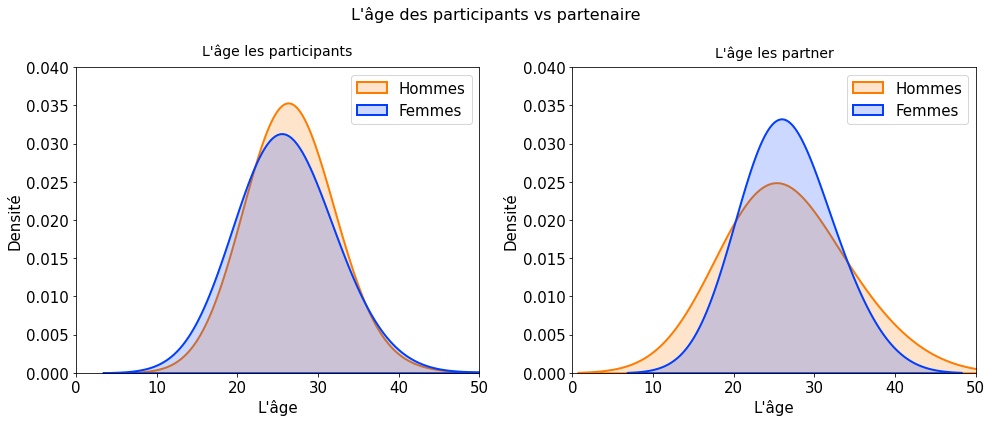

In [13]:
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
#Three integers (nrows, ncols, index). The subplot will take the index position on a grid with nrows rows and ncols columns. 
# index starts at 1 in the upper left corner and increases to the right.
p1=sns.kdeplot(data=df1, x="age", hue="gender", fill=True, common_norm=True, alpha=.2, 
            linewidth=2, bw_adjust=4, palette='bright')
plt.title("L'âge les participants",pad = 12, fontsize = 14)
plt.xlabel("L'âge")
plt.ylabel("Densité")
plt.xlim(0, 50)
plt.ylim(0, 0.04)
plt.legend(loc='upper right', labels=['Hommes', 'Femmes'])


plt.subplot(1,2,2)
p2=sns.kdeplot(data=df1, x="age_o", hue="gender", fill=True, common_norm=True, alpha=.2, 
            linewidth=2, bw_adjust=4, palette='bright')
plt.title("L'âge les partner", fontsize = 14, pad=10)
plt.xlabel("L'âge")
plt.ylabel("Densité")
plt.xlim(0, 50)
plt.ylim(0, 0.04)
plt.legend(loc='upper right', labels=['Hommes', 'Femmes'])

plt.suptitle("L'âge des participants vs partenaire", fontsize=16)

plt.tight_layout(pad=1.0)

plt.show()

In [14]:
fig = px.density_heatmap(df2, x="age_o", y="age", z="count", color_continuous_scale=px.colors.sequential.Sunsetdark,
                            labels={"age_o": "L'âge les partner","age": "L'âge les participants"}, width=600, height=400)                            
fig.update_xaxes(title_font=dict(family = "Arial", size = 16, color = "black"))
fig.update_yaxes(title_font=dict(family = "Arial", size = 16, color = "black"))
fig.layout.coloraxis.colorbar.title = 'Count'
fig.show()

![age](https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/fig5.png)

* Les gens recherchent généralement le partenaire le plus jeune ou du même âge.

In [15]:
df3 = df1.groupby(["race", "race_o"])["iid"].count()
df3 = df3.reset_index()
df3 = df3.rename(columns = {'iid':'count'})
df3.head(2)

,race,race_o,count
0,Africaine,Asiatique,7
1,Africaine,Autre,1


In [16]:
density = df3.pivot("race", "race_o", "count")

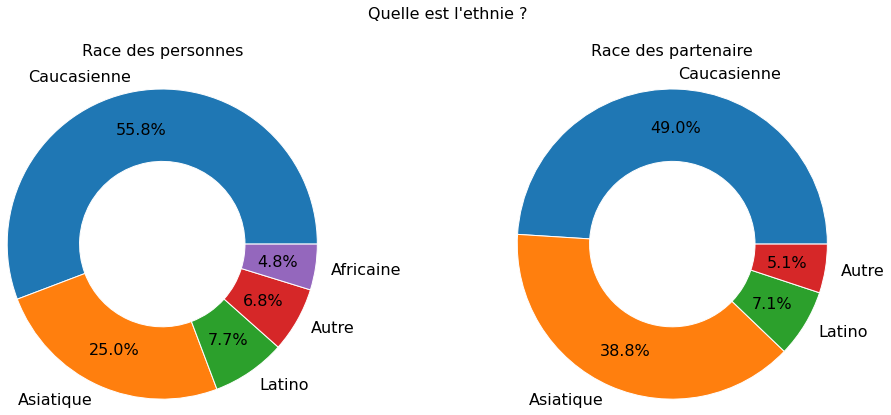

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
explode = (0.05,0.05,0.05,0.05,0.05)
axes[0].pie(df1["race"].value_counts().values, radius = 1.5, labels = df1["race"].value_counts().index, autopct='%1.1f%%', 
            wedgeprops=dict(width=0.7, edgecolor='w'), startangle=0, pctdistance=0.75,  textprops={'fontsize': 16})
axes[0].set_title("Race des personnes",pad=60, fontsize = 16)

axes[1].pie(df1["race_o"].value_counts().values, radius = 1.5, labels = df1["race_o"].value_counts().index, 
        autopct='%1.1f%%', wedgeprops=dict(width=0.7, edgecolor='w'), startangle=0, pctdistance=0.75,  textprops={'fontsize': 16})
axes[1].set_title("Race des partenaire",pad=60, fontsize = 16)

fig.suptitle("Quelle est l'ethnie ?", fontsize=16)

plt.tight_layout(pad=1.0)
plt.show()

* Personne ne veut avoir un partenaire Africain ! 

In [18]:
df1["imprace"].value_counts()

1.0     189
3.0      65
2.0      60
5.0      43
8.0      42
7.0      35
6.0      34
4.0      33
9.0      25
10.0     17
0.0       1
Name: imprace, dtype: int64

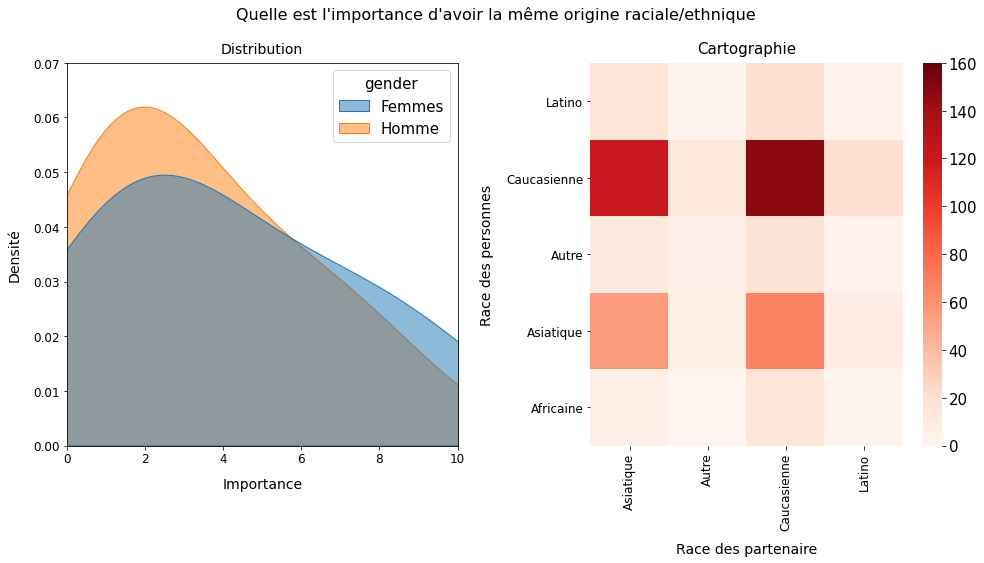

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14,8))
explode = (0.05,0.05,0.05,0.05,0.05)
sns.kdeplot(data=df1, x="imprace", hue="gender", fill=True, common_norm=True, alpha=.5, 
            linewidth=1, bw_adjust=2.5, ax = axes[0])
axes[0].set_title("Distribution",fontsize = 14, pad=10)
axes[0].set_xlabel("Importance",labelpad = 12, fontsize = 14)
axes[0].set_ylabel("Densité",labelpad = 12, fontsize = 14)
axes[0].tick_params(colors='black', labelsize=12)
axes[0].set_xlim(0, 10)
axes[0].set_ylim(0, 0.07)


sns.heatmap(density, annot=False, cmap = "Reds", fmt='.1f', vmin=0, vmax=160, ax = axes[1]).invert_yaxis()
axes[1].set_title("Cartographie", pad=10, fontsize = 15)
axes[1].set_xlabel("Race des partenaire",labelpad = 12, fontsize = 14)
axes[1].set_ylabel("Race des personnes",labelpad = 12, fontsize = 14)
axes[1].tick_params(colors='black', labelsize=12)


fig.suptitle("Quelle est l'importance d'avoir la même origine raciale/ethnique", fontsize=16)

plt.tight_layout(pad=1.0)
plt.show()

* Il semble que les femmes considèrent l'origine raciale/ethnique pour leur décision.
* Les Européens/Caucasiens sont plus d'importance à la race que les autres races.

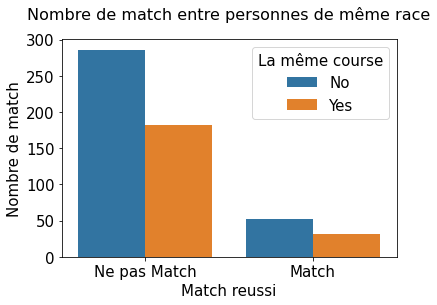

In [20]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="match",hue="samerace",data=df1)
ax.set_xticklabels(["Ne pas Match", "Match"])
plt.xlabel("Match reussi")
plt.ylabel("Nombre de match")
plt.title('Nombre de match entre personnes de même race', fontsize=16, pad=20)
plt.legend(title="La même course", loc='upper right', labels=['No', 'Yes'])
plt.show()

In [21]:
df1["imprelig"].value_counts()

1.0     206
3.0      62
2.0      53
5.0      48
6.0      38
4.0      35
8.0      33
7.0      31
10.0     20
9.0      18
Name: imprelig, dtype: int64

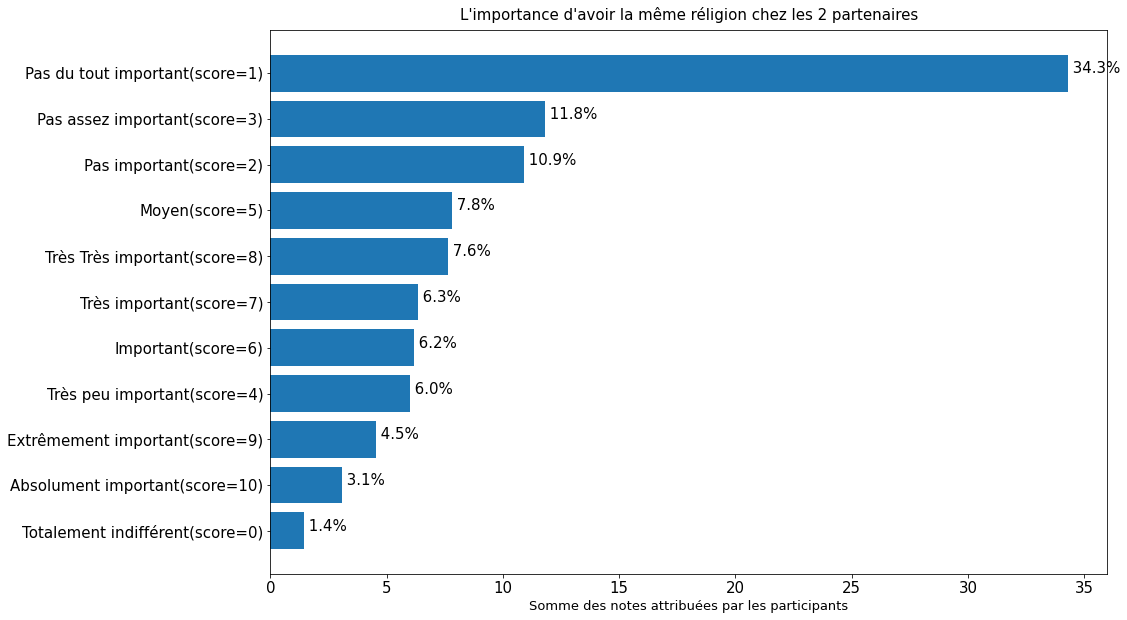

In [22]:
# Caracérisation de l'importance de la réligion lors des dates
imprace = df1["imprace"].apply(lambda x: "Absolument important(score=10)" if x==10
                                else "Extrêmement important(score=9)" if x ==9
                                else "Très Très important(score=8)" if x==8
                                else "Très important(score=7)" if x ==7
                                else "Important(score=6)" if x==6
                                else "Moyen(score=5)" if x==5
                                else "Très peu important(score=4)" if x==4
                                else "Pas assez important(score=3)" if x==3
                                else "Pas important(score=2)" if x==2
                                else "Pas du tout important(score=1)" if x ==1
                                else "Totalement indifférent(score=0)")
imprace_count = imprace.value_counts("imprace", ascending = True )
s = np.sum(imprace_count.values)
repartition = [np.round(element/s*100,2) for element in imprace_count.values]

plt.figure(figsize=(15,10))
plt.barh(imprace_count.index, repartition)
plt.title("L'importance d'avoir la même réligion chez les 2 partenaires", fontsize= 15, pad=10)
plt.xlabel("Somme des notes attribuées par les participants", fontsize= 13)
for i in range(len(repartition)):
    plt.text(repartition[i], imprace_count.index[i],' {:.1f}%'.format(repartition[i]))
plt.xlim(0, 36)
plt.show()

* En général, les gens ne se soucient pas de la religion.

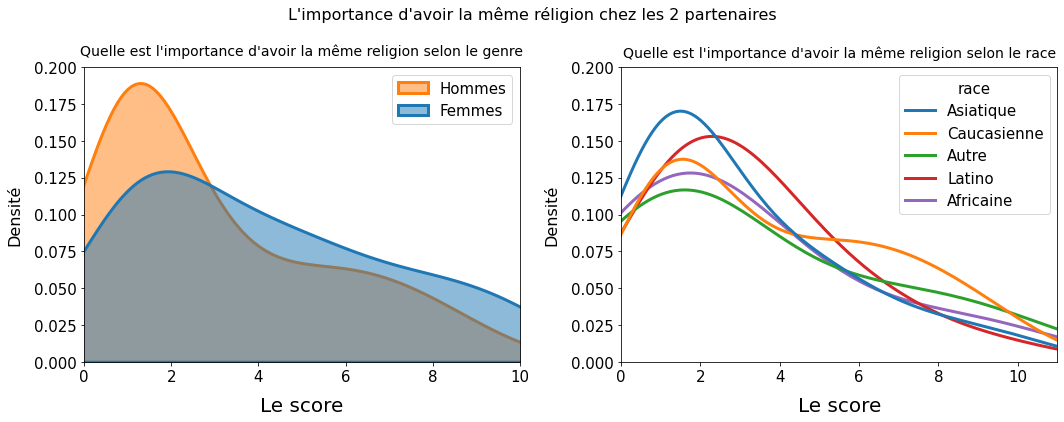

In [23]:
plt.figure(figsize=(15,6))


plt.subplot(1,2,1)
#plt.plot([16,21,21,16,16],[1000,1000,1300,1300,1000],color='red',alpha=0.5)
ax1 = sns.kdeplot(data=df1, x="imprelig", hue="gender", fill=True, common_norm=False, alpha=.5, 
            linewidth=3, bw_adjust=1.5)
plt.title("Quelle est l'importance d'avoir la même religion selon le genre",pad = 12, fontsize = 14)
plt.xlabel("Le score",labelpad = 12, fontsize = 20)
plt.ylabel("Densité",labelpad = 12, fontsize = 16)
plt.xlim(0, 10)
plt.ylim(0, 0.2)
plt.legend(loc='upper right', labels=['Hommes', 'Femmes'])

plt.subplot(1,2,2)
#plt.plot([7,12,12,7,7],[1750,1750,2300,2300,1750],color='red',alpha=0.5)
ax2=sns.kdeplot(data=df1, x="imprelig", hue="race", fill=False, common_norm=False, alpha=0.1, 
           linewidth=3, bw_adjust=1.5)
plt.title("Quelle est l'importance d'avoir la même religion selon le race", fontsize = 14, pad=10)
plt.xlabel("Le score",labelpad = 12, fontsize = 20)
plt.ylabel("Densité",labelpad = 12, fontsize = 16)
plt.xlim(0, 11)
plt.ylim(0, 0.2)

plt.suptitle("L'importance d'avoir la même réligion chez les 2 partenaires", fontsize=16)

plt.tight_layout(pad=1.0)
plt.show()

* Il semble que assez beaucoup de femmes pensent avoir la même religion pour leur décision.
* Les Européens/Caucasiens se séparent en 2 groupes : en tenant compte et sans tenir compte de la religion.
* L'Asiatique ne se soucie pas de la religion pour trouver un partenaire.

In [24]:
cols = ["gender", "race", "race_o", "sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", 
            "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga"]
df2 = df1[cols]
df2.head(2)

,gender,race,race_o,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,Femmes,Asiatique,Caucasienne,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
10,Femmes,Caucasienne,Caucasienne,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0


In [25]:
hobby = ["sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", 
            "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga"]
            
activities = df2.groupby('gender')[hobby].mean()
activities

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
gender,,,,,,,,,,,,,,,,,
Femmes,5.721190,4.115242,6.375465,8.148699,7.449814,7.223048,5.940520,3.234201,5.914498,7.907063,5.732342,7.509294,8.148699,7.152416,8.044610,6.486989,5.078067
Homme,7.054545,4.974545,6.200000,7.410909,6.505455,6.167273,5.578182,4.432727,5.592727,7.392727,4.927273,6.029091,7.654545,6.541818,7.709091,4.741818,3.767273


In [26]:
trace0 = go.Bar(
    x=activities.columns.values,
    y=activities.iloc[0],
    name='Femmes',
    marker=dict(
    color='red'
    )
)
trace1 = go.Bar(
    x=activities.columns.values,
    y=activities.iloc[1],
    name='Hommes',
    marker=dict(
    color='blue'
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title="Intérêt par activités des Hommes vs Femmes",
    font=dict(
        size=16
    ),
    barmode = 'stack',
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

![hobby](https://raw.githubusercontent.com/huynam1012/Projet_jedha/main/fig6.png)

* Pensez-vous à ces activités pour la date : dîner ensemble, partager la lecture de livres de faveur, aller au cinéma ensemble et partager votre musique.

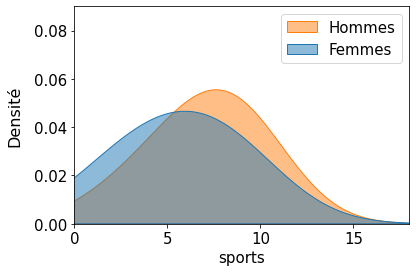

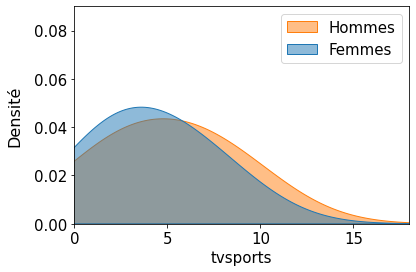

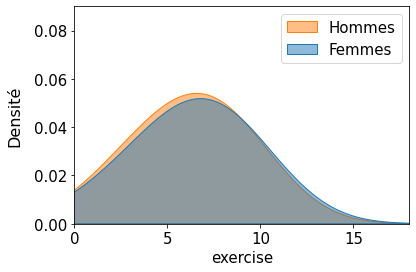

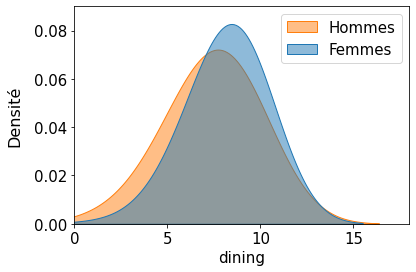

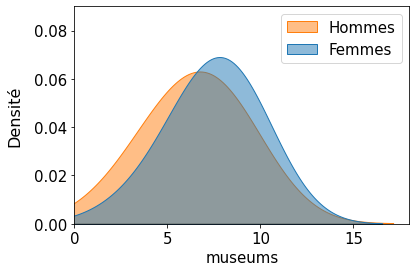

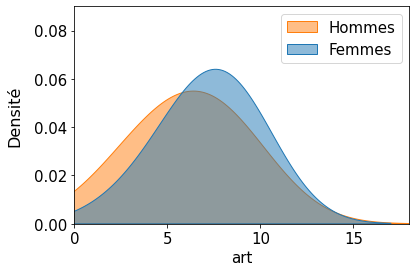

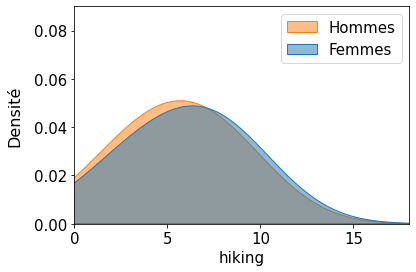

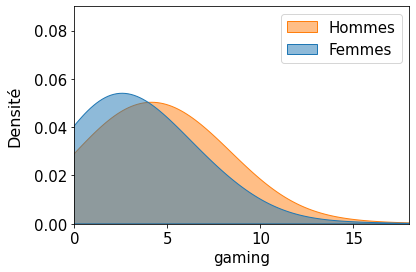

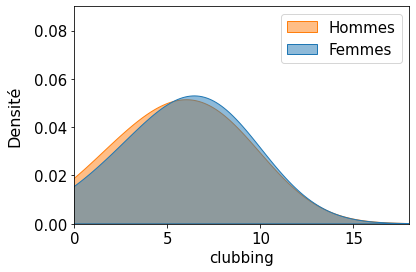

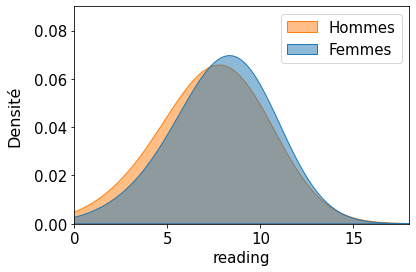

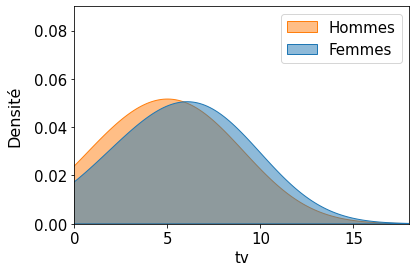

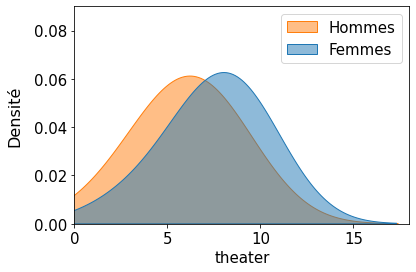

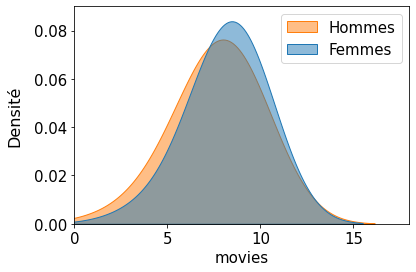

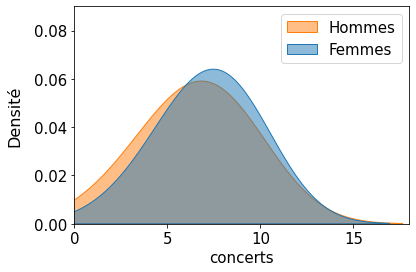

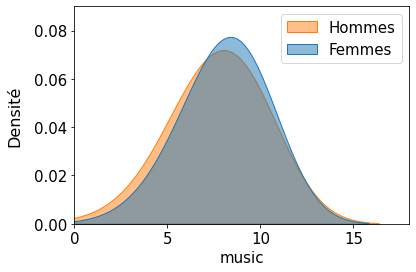

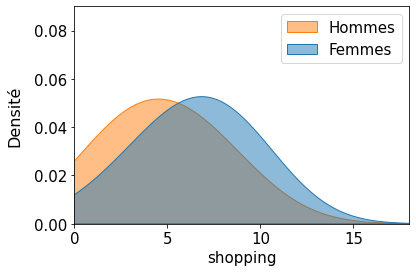

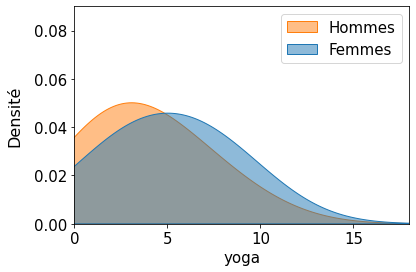

In [27]:
for k in hobby:
    plt.figure()
    sns.kdeplot(x=df2[k], hue=df2["gender"], fill=True, common_norm=True, alpha=.5, linewidth=1, bw_adjust=3.5, legend=True)
    plt.xlim(0, 18)
    plt.ylim(0, 0.09)
    plt.ylabel("Densité",labelpad = 12, fontsize = 16)
    plt.legend(loc='upper right', labels=['Hommes', 'Femmes'])
    plt.show()

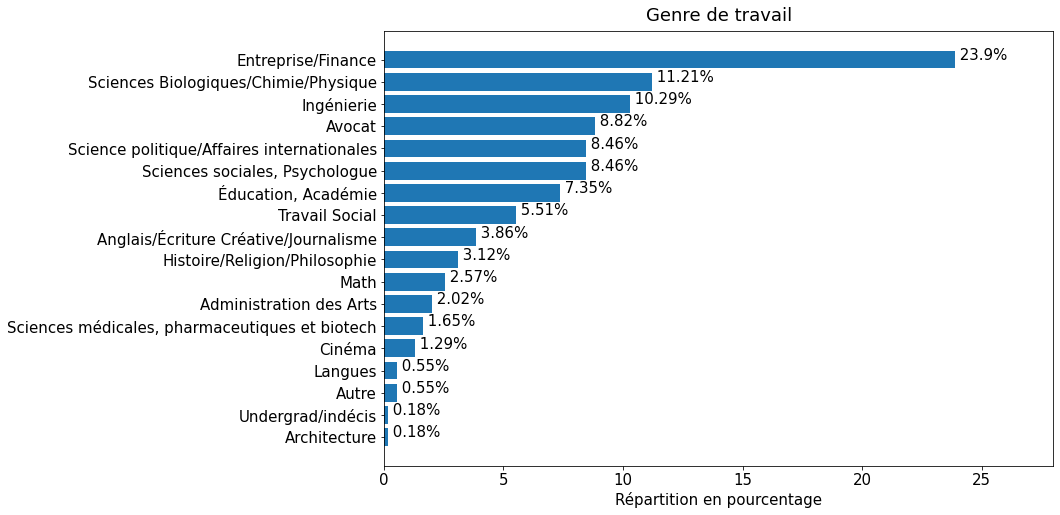

In [28]:
job = df1.value_counts("field_cd", ascending = True )
s = np.sum(job.values)
repartition = [np.round(element/s*100,2) for element in job.values]

plt.figure(figsize=(12,8))
plt.title("Genre de travail", pad=10)
plt.barh(job.index, repartition)
plt.xlabel("Répartition en pourcentage")
for i in range(len(repartition)):
    plt.text(repartition[i], job.index[i],' {}%'.format(repartition[i]))
    
plt.xlim(0, 28)
plt.show()

In [29]:
df_job = df1.groupby(["field_cd", "int_corr"])["iid"].count()
df_job = df_job.reset_index()
df_job = df_job.rename(columns = {'iid':'count'})
df_job.head(2)

,field_cd,int_corr,count
0,Administration des Arts,-0.36,1
1,Administration des Arts,-0.11,1


In [30]:
fig = px.density_heatmap(df_job, x="int_corr", y="field_cd", z="count", color_continuous_scale=px.colors.sequential.Sunsetdark,
                            labels={"field_cd": "Domaine d'études","int_corr": "Corrélation entre le participant et le partenaire"}, width=800, height=600)                            
fig.update_xaxes(title_font=dict(family = "Arial", size = 16, color = "black"))
fig.update_yaxes(title_font=dict(family = "Arial", size = 16, color = "black"))
fig.layout.coloraxis.colorbar.title = 'Count'
fig.show()

In [31]:
df_job = df1.groupby(["field_cd", "like"])["iid"].count()
df_job = df_job.reset_index()
df_job = df_job.rename(columns = {'iid':'count'})
df_job.head(2)

,field_cd,like,count
0,Administration des Arts,3.0,1
1,Administration des Arts,4.0,1


In [32]:
fig = px.density_heatmap(df_job, x="like", y="field_cd", z="count", color_continuous_scale=px.colors.sequential.Sunsetdark,
                            labels={"field_cd": "Domaine d'études","like": "Aimer"}, width=800, height=600)                            
fig.update_xaxes(title_font=dict(family = "Arial", size = 16, color = "black"))
fig.update_yaxes(title_font=dict(family = "Arial", size = 16, color = "black"))
fig.layout.coloraxis.colorbar.title = 'Count'
fig.show()

In [33]:
df_income = df1.groupby(["like", "income"])["iid"].count()
#df_income = df_income.sort_values(by = ["income"])
df_income = df_income.reset_index()
df_income = df_income.rename(columns = {'iid':'count'})
df_income.head(5)

,like,income,count
0,0.0,"36,223.00",1
1,1.0,"15,863.00",1
2,1.0,"25,589.00",1
3,1.0,"38,832.00",1
4,2.0,"109,031.00",1


In [34]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   like    271 non-null    float64
 1   income  271 non-null    object 
 2   count   271 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


In [35]:
fig = px.density_heatmap(df_income, x="like", y="income", z="count", color_continuous_scale=px.colors.sequential.Sunsetdark,
                            labels={"like": "Aimer","income": "Le revenu"}, width=800, height=600)                            
fig.update_xaxes(title_font=dict(family = "Arial", size = 16, color = "black"))
fig.update_yaxes(title_font=dict(family = "Arial", size = 16, color = "black"))
fig.layout.coloraxis.colorbar.title = 'Count'
fig.show()

* Le revenu n'est pas importance.

In [36]:
df2 = df1.groupby("gender")[["gender", "age"]].agg(['mean', 'median', 'min', 'max', 'count'])
df2 = df2.reset_index()
df2

gender        age                         
                mean median   min   max count
0  Femmes  26.126394   26.0  19.0  55.0   269
1   Homme  26.587591   27.0  18.0  42.0   274

In [37]:
df3 = df1.groupby('race')[['race', 'age']].agg(['mean', 'median', 'min', 'max', 'count'])
df3 = df3.reset_index()
df3

race        age                         
                     mean median   min   max count
0    Africaine  26.692308   27.0  20.0  36.0    26
1    Asiatique  26.198529   26.0  18.0  55.0   136
2        Autre  26.162162   25.0  20.0  33.0    37
3  Caucasienne  26.367550   26.0  21.0  42.0   302
4       Latino  26.785714   27.0  19.0  35.0    42

In [38]:
df4 = df1.groupby(['race', 'gender'])[['race','gender', 'age']].agg(['mean', 'median', 'min', 'max', 'count'])
df4 = df4.reset_index()
df4

race  gender        age                         
                             mean median   min   max count
0    Africaine  Femmes  26.625000   26.0  20.0  36.0    16
1    Africaine   Homme  26.800000   27.0  23.0  30.0    10
2    Asiatique  Femmes  26.380282   26.0  21.0  55.0    71
3    Asiatique   Homme  26.000000   26.0  18.0  37.0    65
4        Autre  Femmes  25.125000   25.0  20.0  30.0    16
5        Autre   Homme  26.952381   27.0  22.0  33.0    21
6  Caucasienne  Femmes  25.971631   25.0  21.0  38.0   141
7  Caucasienne   Homme  26.714286   27.0  21.0  42.0   161
8       Latino  Femmes  26.600000   26.0  19.0  35.0    25
9       Latino   Homme  27.058824   28.0  22.0  32.0    17

In [39]:
# df1.race.value_counts(dropna=False)
race = df1["race"].value_counts(dropna=False)
race

Caucasienne    304
Asiatique      136
Latino          42
Autre           37
Africaine       26
NaN              6
Name: race, dtype: int64

In [40]:
# Evaluationn yourseft before meeting.
df2 = df1.groupby("gender")[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].mean()
cols = ["Attractif", "Sincère", "Intelligente", "Amusant", "Ambitieux", "Intérêts partagés"]
df2.columns = cols
df2 = df2.reset_index()
df2

,gender,Attractif,Sincère,Intelligente,Amusant,Ambitieux,Intérêts partagés
0,Femmes,18.020372,18.22223,20.971004,17.299108,12.818476,12.697836
1,Homme,27.248800,16.37960,19.387418,17.600839,8.823956,10.982271


In [41]:
before1 = df2.melt(id_vars="gender").rename(columns=str.title)
before1.round(2)

,Gender,Variable,Value
0,Femmes,Attractif,18.02
1,Homme,Attractif,27.25
2,Femmes,Sincère,18.22
3,Homme,Sincère,16.38
4,Femmes,Intelligente,20.97
5,Homme,Intelligente,19.39
6,Femmes,Amusant,17.30
7,Homme,Amusant,17.60
8,Femmes,Ambitieux,12.82
9,Homme,Ambitieux,8.82


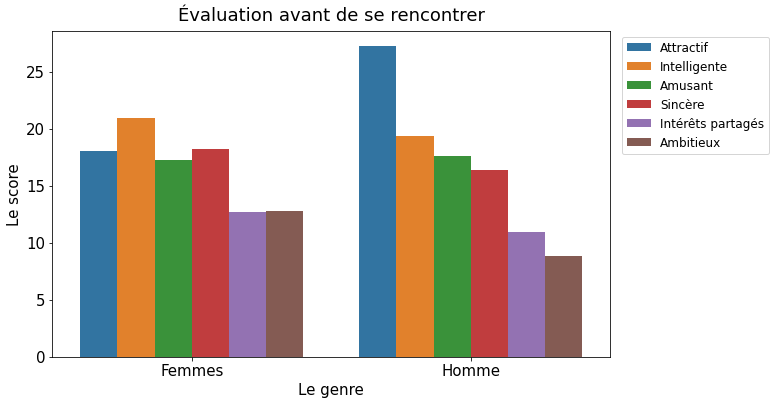

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
def hue_order():
    for g in before1.Gender.unique():
        temp_df = before1[before1["Gender"] == g]
        order = temp_df.sort_values("Value", ascending = False)["Variable"]
    return order
sns.barplot(x="Gender", y="Value", hue= "Variable", data=before1, hue_order = hue_order(), ax = ax)
plt.xlabel("Le genre")
plt.ylabel("Le score")
plt.legend(bbox_to_anchor = (1.01,1), loc = 2, fontsize= 12)
plt.title("Évaluation avant de se rencontrer", pad=10)
plt.show()

* Avant de se rencontrer, les hommes pensent que l'attractivité de la femme est le point le plus important tandis que les femmes considèrent également pour tous les personnages. 

In [43]:
# Evaluation your fellow men/women after meeting.
df4 = df1.groupby("gender")[['gender','attr4_1', 'sinc4_1','intel4_1','fun4_1','amb4_1', 'shar4_1']].mean()
cols = ["Attractif", "Sincère", "Intelligente", "Amusant", "Ambitieux", "Intérêts partagés"]
df4.columns = cols
df4 = df4.reset_index()
after = df4.melt(id_vars="gender").rename(columns=str.title)
after.round(2)

,Gender,Variable,Value
0,Femmes,Attractif,24.35
1,Homme,Attractif,28.31
2,Femmes,Sincère,11.39
3,Homme,Sincère,10.77
4,Femmes,Intelligente,13.05
5,Homme,Intelligente,12.05
6,Femmes,Amusant,15.07
7,Homme,Amusant,16.14
8,Femmes,Ambitieux,11.85
9,Homme,Ambitieux,7.71


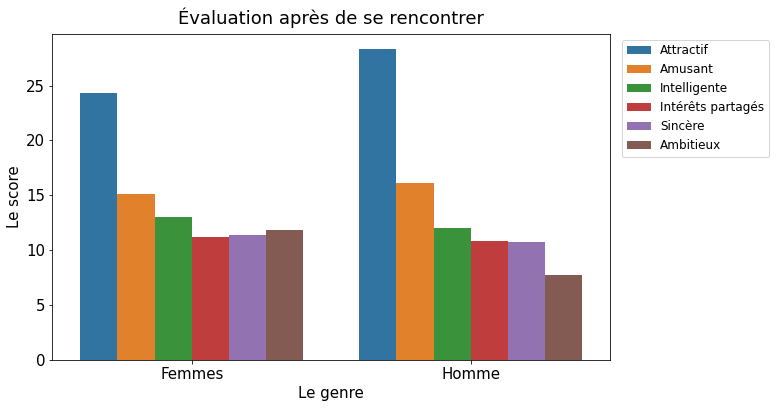

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
def hue_order():
    for g in after.Gender.unique():
        temp_df = after[after["Gender"] == g]
        order = temp_df.sort_values("Value", ascending = False)["Variable"]
    return order
sns.barplot(x="Gender", y="Value", hue= "Variable", data=after, hue_order = hue_order(), ax = ax)
plt.xlabel("Le genre")
plt.ylabel("Le score")
plt.legend(bbox_to_anchor = (1.01,1), loc = 2, fontsize= 12)
plt.title("Évaluation après de se rencontrer", pad=10)
plt.show()

* Avant de se rencontrer, les hommes et les femmes ont clairement évalué l'attractivité en premier place.
* Comme dans l'analyse précédente, les hommes pensent que leurs camarades accordent une grande importance à l'attractivité et sont moins préoccupés par l'ambition d'une femme.
* En revanche, il existe une différence significative dans les réponses des femmes par rapport à l'analyse précédente. Les femmes disent qu'elles-mêmes recherchent un homme bien équilibré et que l'attractivité n'est pas nécessairement importante. Cependant, elles  recherchent principalement des hommes attirants.

In [45]:
# think about your partner before metting
df3 = df1.groupby("gender")[['gender','attr2_1', 'sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].mean()
cols = ["Attractif", "Sincère", "Intelligente", "Amusant", "Ambitieux", "Intérêts partagés"]
df3.columns = cols
df3 = df3.reset_index()
before2 = df3.melt(id_vars="gender").rename(columns=str.title)
before2.round(2)

,Gender,Variable,Value
0,Femmes,Attractif,35.60
1,Homme,Attractif,25.01
2,Femmes,Sincère,11.28
3,Homme,Sincère,15.13
4,Femmes,Intelligente,12.48
5,Homme,Intelligente,16.33
6,Femmes,Amusant,19.05
7,Homme,Amusant,18.02
8,Femmes,Ambitieux,9.11
9,Homme,Ambitieux,14.36


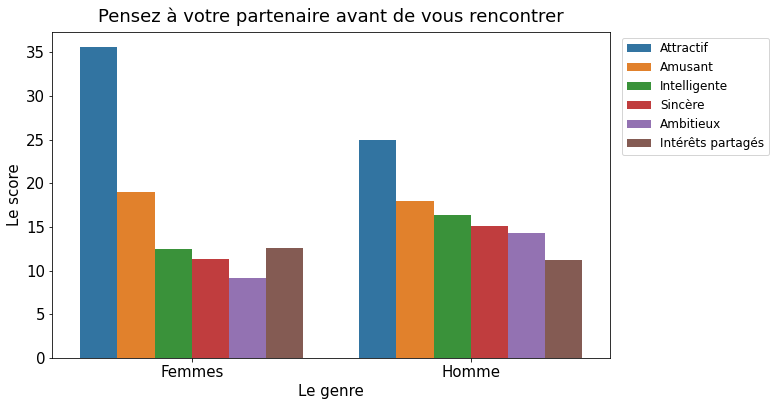

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
def hue_order():
    for g in before2.Gender.unique():
        temp_df = before2[before2["Gender"] == g]
        order = temp_df.sort_values("Value", ascending = False)["Variable"]
    return order
sns.barplot(x="Gender", y="Value", hue= "Variable", data=before2, hue_order = hue_order(), ax = ax)
plt.xlabel("Le genre")
plt.ylabel("Le score")
plt.legend(bbox_to_anchor = (1.01,1), loc = 2, fontsize= 12)
plt.title("Pensez à votre partenaire avant de vous rencontrer", pad=10)
plt.show()

* Les femmes pensent fortement que les hommes sont plus concernés par l'attractivité d'une femme et que d'autres attributs ne sont pas aussi importants, en particulier l'ambition.
* En comparant les réponses des femmes et des hommes dans le premier graphique, nous pouvons voir qu'il n'y a pas beaucoup de différence entre les deux.
* Les principales différences sont un score d'attractivité et un score d'intérêt partagé plus élevé pour les femmes.

In [47]:
#How do you think you measure up after meeting?
df5 = df1.groupby("gender")[['gender','attr3_1', 'sinc3_1','intel3_1','fun3_1','amb3_1']].mean()
cols = ["Attractif", "Sincère", "Intelligente", "Amusant", "Ambitieux"]
df5.columns = cols
df5 = df5.reset_index()
think1 = df5.melt(id_vars="gender").rename(columns=str.title)
think1.round(2)

,Gender,Variable,Value
0,Femmes,Attractif,7.24
1,Homme,Attractif,6.95
2,Femmes,Sincère,8.47
3,Homme,Sincère,8.11
4,Femmes,Intelligente,8.29
5,Homme,Intelligente,8.47
6,Femmes,Amusant,7.90
7,Homme,Amusant,7.51
8,Femmes,Ambitieux,7.63
9,Homme,Ambitieux,7.53


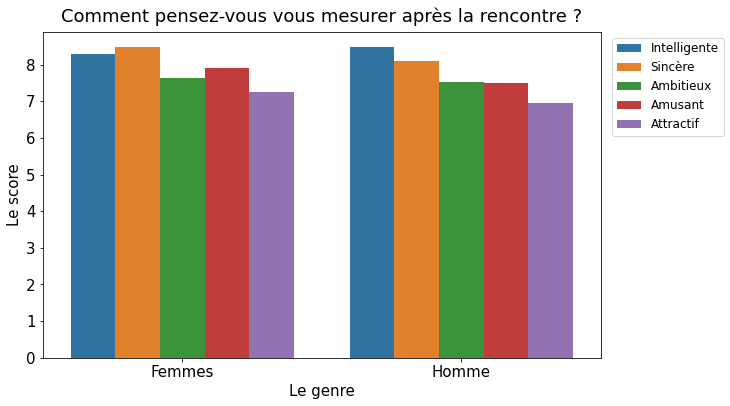

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
def hue_order():
    for g in think1.Gender.unique():
        temp_df = think1[think1["Gender"] == g]
        order = temp_df.sort_values("Value", ascending = False)["Variable"]
    return order
sns.barplot(x="Gender", y="Value", hue= "Variable", data=think1, hue_order = hue_order(), ax = ax)
plt.xlabel("Le genre")
plt.ylabel("Le score")
plt.legend(bbox_to_anchor = (1.01,1), loc = 2, fontsize= 12)
plt.title("Comment pensez-vous vous mesurer après la rencontre ?", pad=10)
plt.show()

In [49]:
#, how do you think others perceive you? 
df6 = df1.groupby("gender")[['gender','attr5_1', 'sinc5_1','intel5_1','fun5_1','amb5_1']].mean()
cols = ["Attractif", "Sincère", "Intelligente", "Amusant", "Ambitieux"]
df6.columns = cols
df6 = df6.reset_index()
think2 = df6.melt(id_vars="gender").rename(columns=str.title)
think2.round(2)

,Gender,Variable,Value
0,Femmes,Attractif,7.06
1,Homme,Attractif,6.81
2,Femmes,Sincère,8.14
3,Homme,Sincère,7.73
4,Femmes,Intelligente,8.21
5,Homme,Intelligente,8.31
6,Femmes,Amusant,7.48
7,Homme,Amusant,7.29
8,Femmes,Ambitieux,7.77
9,Homme,Ambitieux,7.44


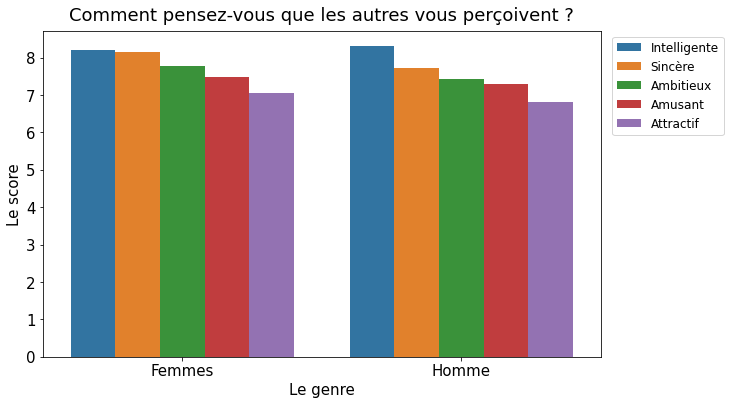

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
def hue_order():
    for g in think2.Gender.unique():
        temp_df = think2[think2["Gender"] == g]
        order = temp_df.sort_values("Value", ascending = False)["Variable"]
    return order
sns.barplot(x="Gender", y="Value", hue= "Variable", data=think2, hue_order = hue_order(), ax = ax)
plt.xlabel("Le genre")
plt.ylabel("Le score")
plt.legend(bbox_to_anchor = (1.01,1), loc = 2, fontsize= 12)
plt.title("Comment pensez-vous que les autres vous perçoivent ?", pad=10)
plt.show()

# Conclusion

Les points importants pour obtenir l'amour :

* Vous devriez sortir ensemble autant que vous le pouvez.
* Vous devriez avoir une motivation au la date de rendez-vous.
* Votre âge doit être assez jeune.
* Sélectionnez la même race pour obtenir une plus grande possibilité de match.
* Dîner ensemble, partager la lecture de livres de faveur, aller au cinéma ensemble et partager votre musique.
* Vous devriez être attractif au la date de rendez-vous.